# Tutorial 11 - Titanic Dataset for EDA

## Importing Libraries

Let's import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data

Let's start by reading the titanic_train.csv dataset into a pandas dataframe

In [2]:
train = pd.read_csv('titanic_train.csv')

Now let's see the columns of this dataset

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

Let's begin some Exploratory data analysis. We can start by identifying the missing data.

## Missing Data

We can use seaborn to create a simple heat map to see where we are missing data!

In [4]:
train.isnull() # 'True' means null 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


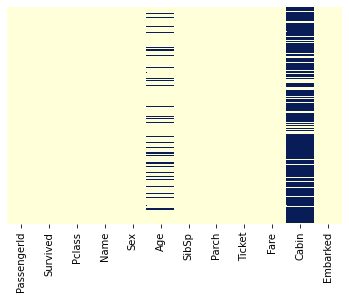

In [5]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="YlGnBu")

A huge amount of data is missing in Cabin column so it has to be removed. But in the case of age we can see that the missing data is few enough to provide suitable replacements with some form of imputation.

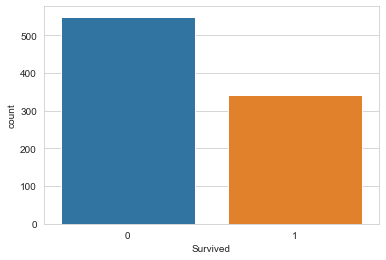

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train)

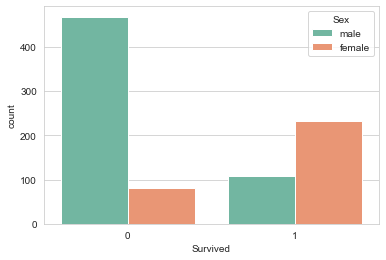

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='Set2')

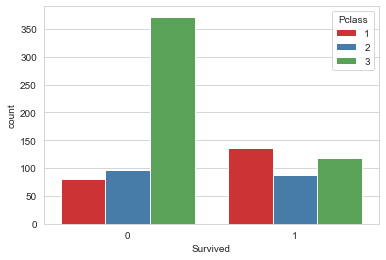

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=train, palette='Set1')

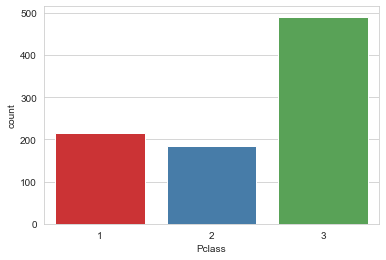

In [9]:
sns.countplot(x='Pclass', data=train, palette='Set1')

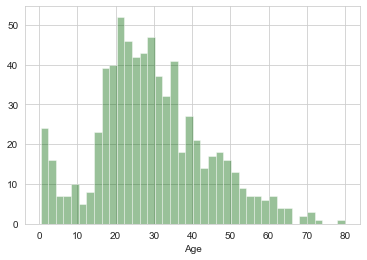

In [10]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkgreen',bins=40)

Another way to plot the same

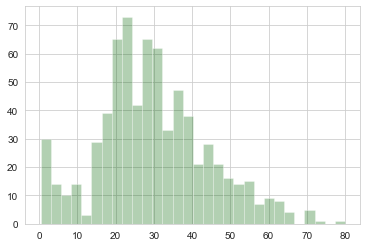

In [11]:
train['Age'].hist(bins=30,alpha=0.3,color='darkgreen')

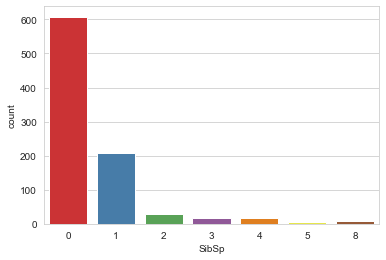

In [12]:
sns.countplot(x='SibSp', data=train,palette='Set1')

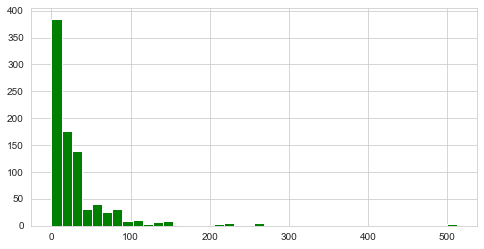

In [13]:
train['Fare'].hist(bins=40,color='green', figsize=(8,4))

## Data Cleaning

We want to fill in missing data of age instead of just dropping the missing data rows. One way to do this is by filling the mean age of all the passengers(imputation). However we can be smarter about this and check the average age by passenger class. For Example:

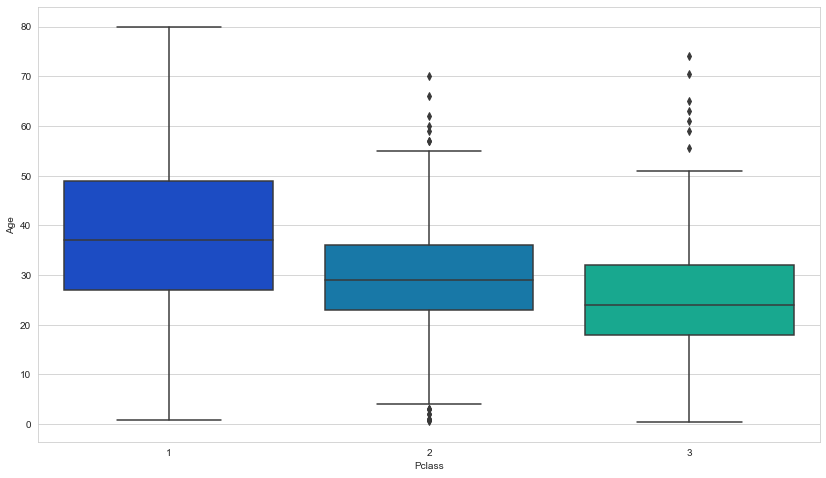

In [14]:
plt.figure(figsize=(14,8)) # figsize decides the length and breadth of the figure, duh!
sns.boxplot(x='Pclass', y='Age', data=train,palette='winter')

We can see that the wealthier passengers in the higher classes tend to be older. We will use these average age based on Pclass to impute the missing age.

In [36]:
def impute_Age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return df[df['Pclass']==1]['Age'].median()

        elif Pclass == 2:
            return df[df['Pclass']==2]['Age'].median()
        
        else:
            return df[df['Pclass']==3]['Age'].median()        

    else:
        return Age
            

Now let's apply the impute_Age function

In [16]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_Age,axis=1)

Checking Heat map again

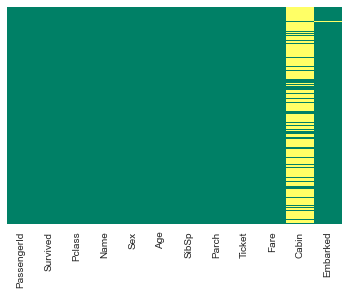

In [17]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='summer')

Now we will drop the Cabin column because it has too many null values and we can also drop the NaN row in Embarked

In [18]:
train.drop('Cabin', axis=1, inplace=True)

In [19]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


We can see that the column cabin has been dropped

In [20]:
train.dropna(inplace=True)

## Converting Categorical Features

We will need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm will not be able to take in those features as inputs

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [22]:
pd.get_dummies(train['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [23]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embarked = pd.get_dummies(train['Embarked'],drop_first=True)

In [24]:
train.drop(['Name', 'Sex', 'Embarked', 'Ticket'], axis=1, inplace=True)

In [28]:
train.drop('PassengerId', axis=1, inplace=True)

In [29]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [26]:
train = pd.concat([train, sex, embarked],axis=1)

In [27]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


The data is ready for the model

## Building a Logistic Regression model

Let's start by splitting our data into a training set and a test set

### Train test split

In [30]:
train.drop('Survived', axis=1).head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [31]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived', axis=1), train['Survived'], test_size=0.30, 
                                                    random_state=101)

### Training and Predicting

In [34]:
from sklearn.linear_model import LogisticRegression

In [58]:
logmodel = LogisticRegression(max_iter=250)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=250)

In [59]:
predictions = logmodel.predict(X_test)

In [60]:
from sklearn.metrics import confusion_matrix

In [61]:
accuracy = confusion_matrix(y_test, predictions)

In [62]:
accuracy

array([[150,  13],
       [ 32,  72]], dtype=int64)

In [63]:
from sklearn.metrics import accuracy_score

In [64]:
accuracy = accuracy_score(y_test,predictions)
accuracy

0.8314606741573034

In [65]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)